In [88]:
import pandas as pd

In [157]:
df = pd.read_csv(r'XT Dec24_15min.csv')

In [159]:
df.head()

,Timestamp (UTC),Open,High,Low,Close,XT Dec24: Volume
0,2024-09-23 14:12:00,95.990,96.000,95.985,96.000,565
1,2024-09-23 14:27:00,96.000,96.010,95.995,96.010,843
2,2024-09-23 14:42:00,96.010,96.015,96.005,96.010,1446
3,2024-09-23 14:57:00,96.010,96.020,96.005,96.005,672
4,2024-09-23 15:12:00,96.005,96.015,96.005,96.010,395


In [217]:
df.shape

(851, 11)

#### Preparing data

Enter __volume column name__:

In [163]:
df.rename(columns = {'XT Dec24: Volume' : 'Volume'}, inplace = True)

In [165]:
df.head(2)

,Timestamp (UTC),Open,High,Low,Close,Volume
0,2024-09-23 14:12:00,95.99,96.00,95.985,96.00,565
1,2024-09-23 14:27:00,96.00,96.01,95.995,96.01,843


In [167]:
df['H-L'] = df['High'] - df['Low']
df['O-C'] = df['Open'] - df['Close']

#### Calculating MA

rolling() mean()

In [170]:
# Calculate 8-period and 16-period moving averages on 'Close'
df['MA_S'] = df['Close'].rolling(window=8).mean()
df['MA_L'] = df['Close'].rolling(window=24).mean()
df['MA_L-MA_S'] = df['MA_L'] - df['MA_S']

#### Statistical analysis

In [173]:
df.describe(percentiles = [0.1,0.25,0.5,0.75,0.9])

,Open,High,Low,Close,Volume,H-L,O-C,MA_S,MA_L,MA_L-MA_S
count,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,844.000000,828.000000,828.000000
mean,96.004906,96.009471,96.000076,96.004694,1555.443008,0.009395,0.000212,96.005593,96.007392,0.002352
std,0.067624,0.067800,0.067743,0.067921,1777.104845,0.005310,0.006316,0.066334,0.062921,0.009424
min,95.770000,95.785000,95.770000,95.770000,1.000000,0.000000,-0.025000,95.786875,95.790625,-0.027500
10%,95.920000,95.925000,95.915000,95.920000,109.000000,0.005000,-0.005000,95.922687,95.926625,-0.009021
25%,95.990000,95.995000,95.985000,95.990000,395.500000,0.005000,-0.005000,95.991875,96.000156,-0.003125
50%,96.025000,96.030000,96.020000,96.025000,1137.000000,0.010000,0.000000,96.027187,96.028750,0.003125
75%,96.045000,96.050000,96.040000,96.045000,2231.500000,0.010000,0.005000,96.042500,96.041875,0.008542
90%,96.060000,96.065000,96.055000,96.060000,3456.000000,0.015000,0.010000,96.060000,96.057292,0.012708
max,96.110000,96.110000,96.100000,96.100000,30306.000000,0.065000,0.035000,96.098750,96.095833,0.037917


Enter __tick size__:

In [238]:
tick_size = 0.005

[0.    0.005 0.01  0.015 0.02  0.025 0.03  0.035 0.04  0.045 0.05  0.055
 0.06  0.065]


Text(0.5, 1.0, 'Histogram with Tick Size of 0.005')

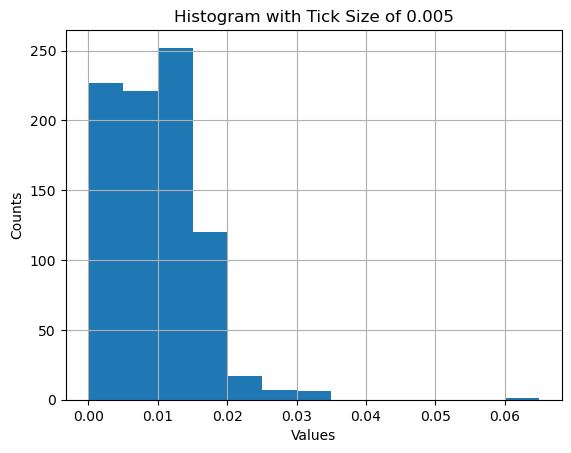

In [243]:
import numpy as np
# Plot a histogram of movement
#df['H-L'].hist(bins=8, rwidth=0.8)

# Create bins from the minimum to maximum value based on the tick size
bins = np.arange(df['H-L'].min(), df['H-L'].max() + tick_size, tick_size)
print(bins)
# Plot the histogram with the specified bins
df['H-L'].hist(bins=bins, rwidth=1)

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Counts')
plt.title(f'Histogram with Tick Size of {tick_size}')

#### Visualizing trend

plt.plot(x,y,color)

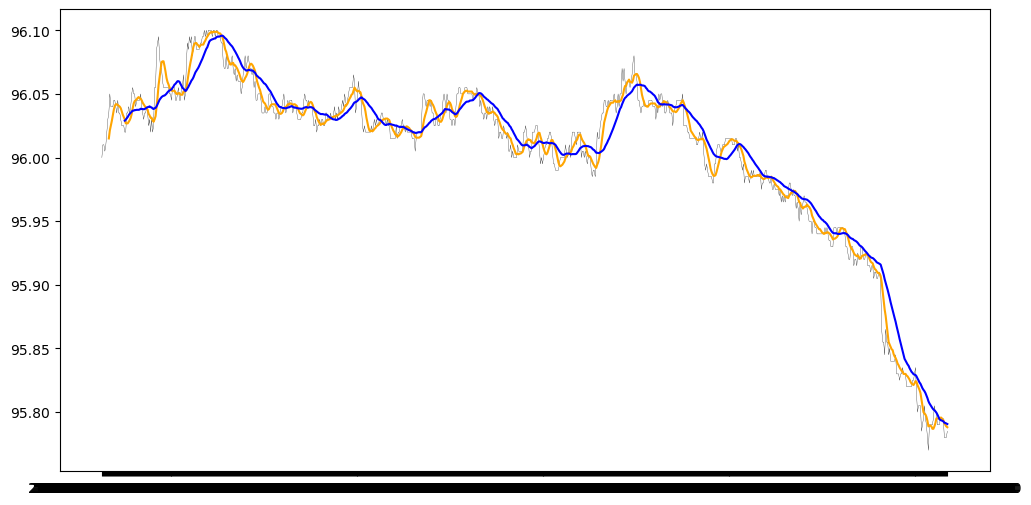

In [188]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
# Plot Close prices
plt.plot(df['Timestamp (UTC)'], df['Close'], label='Close', color='black', lw=0.2)

# Plot shorter-period moving average
plt.plot(df['Timestamp (UTC)'], df['MA_S'], label='MA S', color='orange')

# Plot longer-period moving average
plt.plot(df['Timestamp (UTC)'], df['MA_L'], label='MA L', color='blue')